# Importación de librerias

In [1]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lectura de archivos 

In [2]:
d = path.dirname(".")

# Read the whole text.
text = open(path.join(d, 'Don Quijote, by Miguel de Cervantes Saavedra.txt'), encoding="utf8").read()
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

# stop words url: https://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/

# Limpieza de texto

In [3]:
from string import punctuation
import string

filtered_text = text

filtered_text = filtered_text.split("*** START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[1]
filtered_text = filtered_text.split("*** END OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[0]

# lower to get better comparison
filtered_text = filtered_text.lower()
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + '¿¡'

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [4]:
# filtered_text

# Palabras mas frecuentes

In [5]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('quijote', 2176),
 ('sancho', 2148),
 ('dijo', 1807),
 ('señor', 1063),
 ('respondió', 1062),
 ('así', 1061),
 ('merced', 899),
 ('pues', 862),
 ('sino', 694),
 ('caballero', 661),
 ('decir', 578),
 ('hacer', 535),
 ('dios', 531),
 ('aunque', 530),
 ('aquí', 516),
 ('señora', 515),
 ('aquel', 487),
 ('mal', 459),
 ('cosa', 447),
 ('buen', 442)]

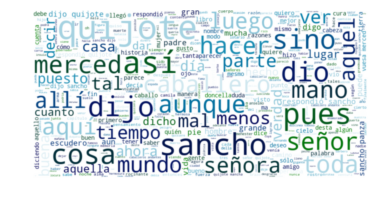

In [6]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

#  Comparación de wordcloud limpiando texto con textacy

In [7]:
import textacy
import textacy.datasets
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

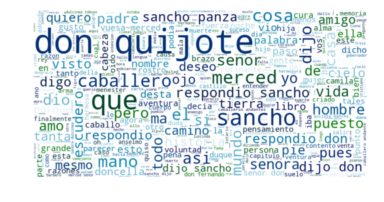

In [8]:
textacy_text = text

textacy_text = textacy_text.split("*** START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[1]
textacy_text = textacy_text.split("*** END OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[0]

textacy_text=textacy.preprocess.normalize_whitespace(textacy_text)

textacy_text = ' '.join([word for word in textacy_text.split() if word not in STOP_WORDS])

texto_prc=textacy.preprocess.preprocess_text(textacy_text, fix_unicode=True, lowercase=True, transliterate=False, no_urls=True, no_emails=True, no_phone_numbers=True, no_numbers=False, no_currency_symbols=True, no_punct=True, no_contractions=False, no_accents=True)

wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(texto_prc)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
import nltk
import string

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nameparser.parser import HumanName
from nltk.corpus import wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lprone\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lprone\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lprone\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lprone\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lprone\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


ModuleNotFoundError: No module named 'nameparser'

In [33]:
#texto_prc

In [ ]:
saludos = ["Hola", "Hello", "Bonjour", "Guten Tag", "Buon giorno", "Bom dia"]
for saludo in saludos:
    print(textacy.text_utils.detect_language(saludo))

In [8]:
nes = textacy.extract.named_entities(texto_prc)

In [26]:
texts = textacy.io.read_text('Don Quijote, by Miguel de Cervantes Saavedra.txt', lines=True)
doc = textacy.Doc(texts)
list(textacy.extract.named_entities(doc, drop_determiners=True, exclude_types='numeric'))[:10]

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [17]:
textacy.Doc(texto_prc)

OSError: [E050] Can't find model 'es'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [45]:
import nltk
for sent in nltk.sent_tokenize(texto_prc):
   for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
         print(chunk.label(), ' '.join(c[0] for c in chunk))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Searched in:
    - 'C:\\Users\\lprone/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\lprone\\Anaconda3\\nltk_data'
    - 'C:\\Users\\lprone\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\lprone\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\lprone\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************


In [ ]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(texto_prc)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [ ]:
https://spacy.io/usage/linguistic-features#named-entities

    
    personajes = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            personajes[ent.lemma_] += 1
            
    return personajes.most_common()

In [11]:
from normalization import normalize_corpus, parse_document
from utils import build_feature_matrix, low_rank_svd
import numpy as np

ModuleNotFoundError: No module named 'normalization'

In [10]:
toy_text = """
Elephants are large mammals of the family Elephantidae 
and the order Proboscidea. Two species are traditionally recognised, 
the African elephant and the Asian elephant. Elephants are scattered 
throughout sub-Saharan Africa, South Asia, and Southeast Asia. Male 
African elephants are the largest extant terrestrial animals. All 
elephants have a long trunk used for many purposes, 
particularly breathing, lifting water and grasping objects. Their 
incisors grow into tusks, which can serve as weapons and as tools 
for moving objects and digging. Elephants' large ear flaps help 
to control their body temperature. Their pillar-like legs can 
carry their great weight. African elephants have larger ears 
and concave backs while Asian elephants have smaller ears 
and convex or level backs.  
"""


from gensim.summarization import summarize, keywords

def text_summarization_gensim(text, summary_ratio=0.5):
    
    summary = summarize(text, split=True, ratio=summary_ratio)
    for sentence in summary:
        print(sentence)

docs = parse_document(toy_text)
text = ' '.join(docs)
text_summarization_gensim(text, summary_ratio=0.4)


    
sentences = parse_document(toy_text)
norm_sentences = normalize_corpus(sentences,lemmatize=False) 

total_sentences = len(norm_sentences)
print('Total Sentences in Document:', total_sentences)



num_sentences = 3
num_topics = 2

vec, dt_matrix = build_feature_matrix(sentences, 
                                      feature_type='frequency')

td_matrix = dt_matrix.transpose()
td_matrix = td_matrix.multiply(td_matrix > 0)

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
                                         
sv_threshold = 0.5
min_sigma_value = max(s) * sv_threshold
s[s < min_sigma_value] = 0

salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
print(np.round(salience_scores, 2))

top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
top_sentence_indices.sort()
print(top_sentence_indices)

for index in top_sentence_indices:
    print(sentences[index])
    
    
def lsa_text_summarizer(documents, num_sentences=2,
                        num_topics=2, feature_type='frequency',
                        sv_threshold=0.5):
                            
    vec, dt_matrix = build_feature_matrix(documents, 
                                          feature_type=feature_type)

    td_matrix = dt_matrix.transpose()
    td_matrix = td_matrix.multiply(td_matrix > 0)

    u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
    min_sigma_value = max(s) * sv_threshold
    s[s < min_sigma_value] = 0
    
    salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
    top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
    top_sentence_indices.sort()
    
    for index in top_sentence_indices:
        print(sentences[index])
    
    
    

import networkx

num_sentences = 3
vec, dt_matrix = build_feature_matrix(norm_sentences, 
                                      feature_type='tfidf')
similarity_matrix = (dt_matrix * dt_matrix.T)
print np.round(similarity_matrix.todense(), 2)

similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)

networkx.draw_networkx(similarity_graph)

scores = networkx.pagerank(similarity_graph)

ranked_sentences = sorted(((score, index) 
                            for index, score 
                            in scores.items()), 
                          reverse=True)
ranked_sentences

top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()
print top_sentence_indices

for index in top_sentence_indices:
    print(sentences[index])
    

def textrank_text_summarizer(documents, num_sentences=2,
                             feature_type='frequency'):
    
    vec, dt_matrix = build_feature_matrix(norm_sentences, 
                                      feature_type='tfidf')
    similarity_matrix = (dt_matrix * dt_matrix.T)
        
    similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
    scores = networkx.pagerank(similarity_graph)   
    
    ranked_sentences = sorted(((score, index) 
                                for index, score 
                                in scores.items()), 
                              reverse=True)

    top_sentence_indices = [ranked_sentences[index][1] 
                            for index in range(num_sentences)]
    top_sentence_indices.sort()
    
    for index in top_sentence_indices:
        print(sentences[index])
    

DOCUMENT = """
The Elder Scrolls V: Skyrim is an open world action role-playing video game 
developed by Bethesda Game Studios and published by Bethesda Softworks. 
It is the fifth installment in The Elder Scrolls series, following 
The Elder Scrolls IV: Oblivion. Skyrim's main story revolves around 
the player character and their effort to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. 
The game is set two hundred years after the events of Oblivion 
and takes place in the fictional province of Skyrim. The player completes quests 
and develops the character by improving skills. 
Skyrim continues the open world tradition of its predecessors by allowing the 
player to travel anywhere in the game world at any time, and to 
ignore or postpone the main storyline indefinitely. The player may freely roam 
over the land of Skyrim, which is an open world environment consisting 
of wilderness expanses, dungeons, cities, towns, fortresses and villages. 
Players may navigate the game world more quickly by riding horses, 
or by utilizing a fast-travel system which allows them to warp to previously 
Players have the option to develop their character. At the beginning of the game, 
players create their character by selecting one of several races, 
including humans, orcs, elves and anthropomorphic cat or lizard-like creatures, 
and then customizing their character's appearance.discovered locations. Over the 
course of the game, players improve their character's skills, which are numerical 
representations of their ability in certain areas. There are eighteen skills 
divided evenly among the three schools of combat, magic, and stealth. 
Skyrim is the first entry in The Elder Scrolls to include Dragons in the game's 
wilderness. Like other creatures, Dragons are generated randomly in the world 
and will engage in combat. 
"""


sentences = parse_document(DOCUMENT)
norm_sentences = normalize_corpus(sentences,lemmatize=True) 
print("Total Sentences:", len(norm_sentences))

lsa_text_summarizer(norm_sentences, num_sentences=3,
                    num_topics=5, feature_type='frequency',
                    sv_threshold=0.5)  

textrank_text_summarizer(norm_sentences, num_sentences=3,
                         feature_type='tfidf')    

SyntaxError: invalid syntax (<ipython-input-10-73f2ebe4f3e4>, line 101)